<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


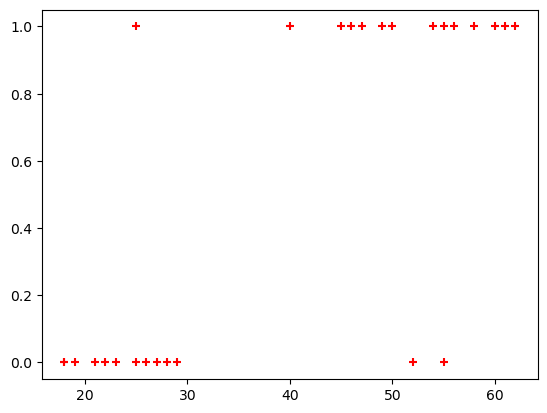

In [42]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8,random_state=43)

In [45]:
X_test

,age
8,62
7,60
10,18
20,21
6,55
26,23


In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [47]:
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
X_test

,age
8,62
7,60
10,18
20,21
6,55
26,23


In [49]:
y_predicted = model.predict(X_test)

In [50]:
model.predict_proba(X_test)

array([[0.0150335 , 0.9849665 ],
       [0.0206307 , 0.9793693 ],
       [0.94814392, 0.05185608],
       [0.91854475, 0.08145525],
       [0.04501788, 0.95498212],
       [0.89095551, 0.10904449]])

In [51]:
model.score(X_test,y_test)

0.8333333333333334

In [52]:
y_predicted

array([1, 1, 0, 0, 1, 0], dtype=int64)

In [53]:
X_test

,age
8,62
7,60
10,18
20,21
6,55
26,23


**model.coef_ indicates value of m in y=m*x + b equation**

In [55]:
model.coef_

array([[0.16109911]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [57]:
model.intercept_

array([-5.80581805])

**Lets defined sigmoid function now and do the math with hand**

In [59]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [60]:
def prediction_function(age):
    z = 0.161 * age - 5.80
    y = sigmoid(z)
    return y

In [62]:
age = 30
prediction_function(age)

0.27488050221017696

**0.274 is less than 0.5 which means person with 35 age will *not* buy insurance**


In [64]:
age = 43
prediction_function(age)

0.7545447615401272

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ---------------------------
# Step 1: Load dataset
# ---------------------------
df = pd.read_csv("weight-height.csv")

# Encode Gender: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

X = df[['Height', 'Weight']].values
y = df['Gender'].values.reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term (intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # shape (n, 3)

# ---------------------------
# Step 2: Sigmoid Function
# ---------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ---------------------------
# Step 3: Loss Function (Binary Cross Entropy)
# ---------------------------
def compute_loss(y, y_pred):
    m = len(y)
    epsilon = 1e-8  # avoid log(0)
    return - (1/m) * np.sum(y * np.log(y_pred + epsilon) + (1-y) * np.log(1 - y_pred + epsilon))



In [81]:
# ---------------------------
# Step 4: Gradient Descent
# ---------------------------
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n,1))
    loss_history=[]
    for epoch in range(epochs):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        loss_history.append(compute_loss(y, y_pred))
        gradient = np.dot(X.T, (y_pred - y))/ m
        theta -= lr * gradient
    return theta, loss_history



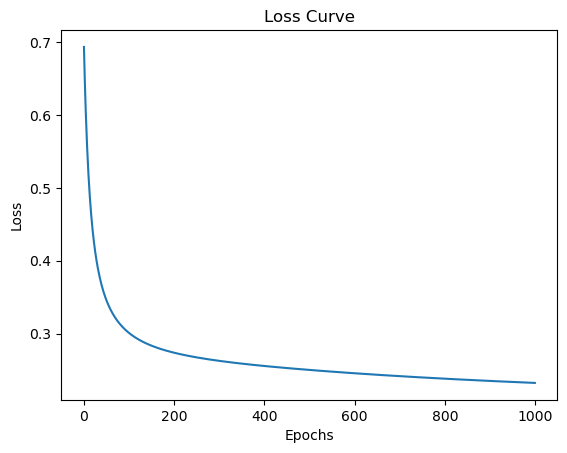

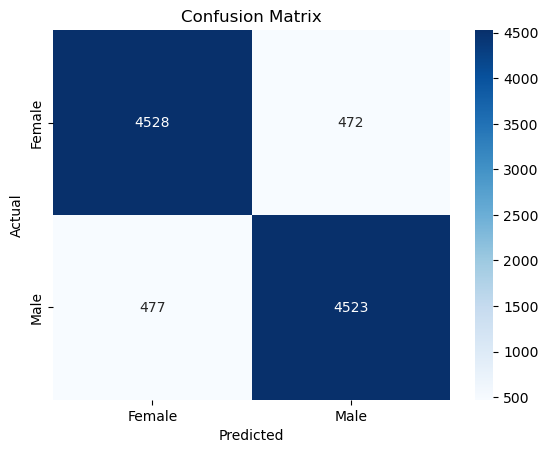

              precision    recall  f1-score   support

      Female       0.90      0.91      0.91      5000
        Male       0.91      0.90      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [83]:


# ---------------------------
# Step 5: Train Model
# ---------------------------
theta, loss_history = gradient_descent(X, y, lr=0.1, epochs=1000)

# ---------------------------
# Step 6: Predictions
# ---------------------------
y_pred_prob = sigmoid(np.dot(X, theta))
y_pred = (y_pred_prob >= 0.5).astype(int)

# ---------------------------
# Step 7: Plot Loss Curve
# ---------------------------
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# ---------------------------
# Step 8: Confusion Matrix
# ---------------------------
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Female", "Male"],
            yticklabels=["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ---------------------------
# Step 9: Classification Report
# ---------------------------
print(classification_report(y, y_pred, target_names=["Female", "Male"]))

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv('HR_comma_sep.csv')
print(df.head())
print(df.info())
print(df['left'].value_counts())  # target variable

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

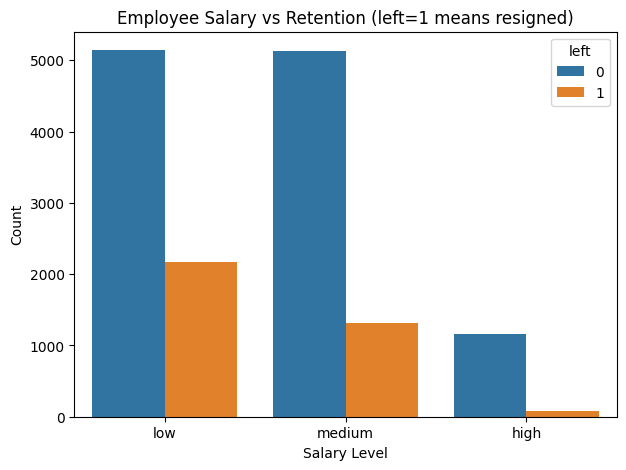

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='salary', hue='left')
plt.title('Employee Salary vs Retention (left=1 means resigned)')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()

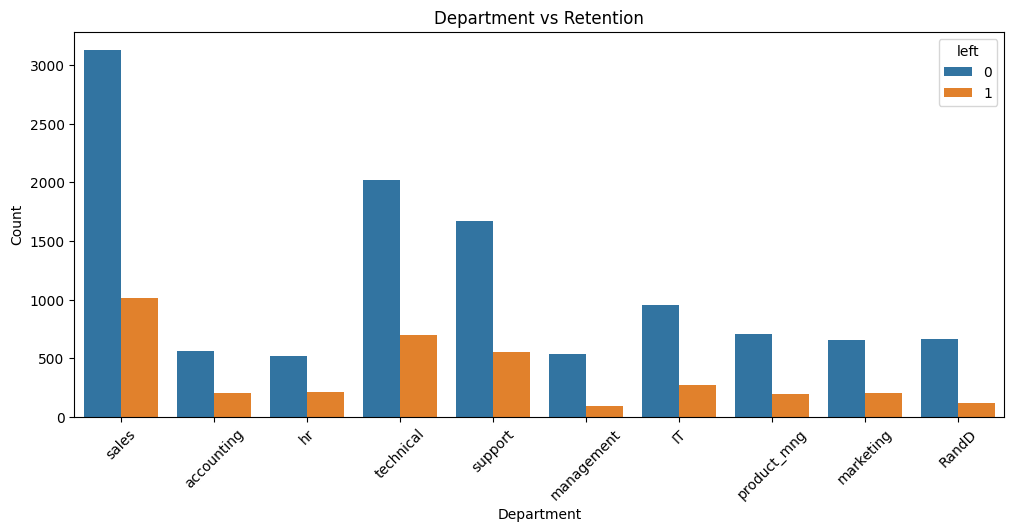

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Department', hue='left')
plt.title('Department vs Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [28]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print('\nMean of numeric columns by left (retention):\n',
      df.groupby('left')[numeric_cols].mean())
 
print('\nRetention rate by salary category:\n',
      df.groupby('salary')['left'].mean())
print('\nRetention rate by department:\n',
      df.groupby('Department')['left'].mean())


Mean of numeric columns by left (retention):
       satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  left  \
left                                                                  
0               199.060203            3.380032       0.175009   0.0   
1               207.419210            3.876505       0.047326   1.0   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  

Retention rate by salary category:
 salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64

Retention rate by department:
 Department
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing   

In [20]:
df_model = df.copy()
df_model = pd.get_dummies(df_model, columns=['salary','Department'], drop_first=True)


In [22]:
features = [
    'satisfaction_level', 'last_evaluation', 'number_project', 
    'average_montly_hours', 'time_spend_company', 'Work_accident', 
    'promotion_last_5years'
] + [col for col in df_model.columns if col.startswith('salary_') or col.startswith('Department_')]
X = df_model[features]
y = df_model['left']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
 
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Model accuracy:", acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model accuracy: 0.7933333333333333

Confusion Matrix:
 [[2131  155]
 [ 465  249]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.62      0.35      0.45       714

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000

